<a href="https://colab.research.google.com/github/Psubinn/BigData-Analyst/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_%EC%8B%A4%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHAP3
1. 데이터 수집
- 데이터 로딩

In [ ]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata

fatal: destination path 'yemoonsaBigdata' already exists and is not an empty directory.


In [ ]:
import pandas as pd

data = pd.read_csv('./yemoonsaBigdata/datasets/Part2/housing_data.csv', header=None, sep=',')
col_names = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV','isHightValue']
data.columns = col_names

In [ ]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  isHightValue  
0     15.3  396.90   4.98  24.0             0  
1     17.8  396.90   9.14  21.6             0  
2     17.8  392.83   4.03  34.7             1  
3     18.7  394.63   2.94  33.4             1  
4     18.7  396.90   5.33  36.2             1  


2. 데이터 전처리
- 데이터 확인

In [ ]:
print(data.shape)

(526, 15)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            526 non-null    float64
 2   INDUS         526 non-null    float64
 3   CHAS          526 non-null    int64  
 4   NOX           526 non-null    float64
 5   RM            526 non-null    float64
 6   AGE           526 non-null    float64
 7   DIS           526 non-null    float64
 8   RAD           526 non-null    int64  
 9   TAX           526 non-null    float64
 10  PTRATIO       526 non-null    float64
 11  B             526 non-null    float64
 12  LSTAT         526 non-null    float64
 13  MEDV          526 non-null    float64
 14  isHightValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


In [ ]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     3.613524   10.931559   11.306616    0.066540    0.555954    6.271076   
std      8.601545   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.613500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

- 결측치 처리

In [ ]:
print(data.isnull().sum())

CRIM            20
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
isHightValue     0
dtype: int64


In [ ]:
print(data.isnull().sum()/data.shape[0])

CRIM            0.038023
ZN              0.000000
INDUS           0.000000
CHAS            0.000000
NOX             0.000000
RM              0.000000
AGE             0.000000
DIS             0.000000
RAD             0.000000
TAX             0.000000
PTRATIO         0.000000
B               0.000000
LSTAT           0.000000
MEDV            0.000000
isHightValue    0.000000
dtype: float64


In [ ]:
# 결측치를 다른 값으로 대치할 경우
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

- 결측치 제거

In [ ]:
data = data.loc[data['CRIM'].notnull(), ]
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

- 이상치 처리

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


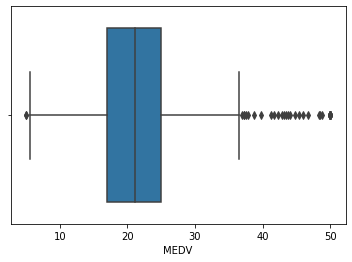

In [ ]:
import seaborn as sns

sns.boxplot(data['MEDV'])

In [ ]:
3Q1, Q3 = data['MEDV'].quantile([0.25,0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('outlier 범위 : %.2f 초과 또는 %.2f 미만' % (upper_bound, lower_bound))
print('outlier 개수 : %.0f' % len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)]))
print('outlier 비율 : %.2f' % (len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)])/len(data)))

outlier 범위 : 36.96 초과 또는 5.06 미만
outlier 개수 : 40
outlier 비율 : 0.08


In [ ]:
def get_outlier_prop(x):

  Q1, Q3 = x.quantile([0.25,0.75])
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  outliers = x[(x>upper_bound)|(x<lower_bound)]

  return str(round(100*len(outliers)/len(x),1)) + '%'

print(data.apply(get_outlier_prop))

CRIM            13.0%
ZN              13.4%
INDUS            0.0%
CHAS             6.9%
NOX              0.0%
RM               5.9%
AGE              0.0%
DIS              1.0%
RAD              0.0%
TAX              0.0%
PTRATIO          3.0%
B               15.2%
LSTAT            1.4%
MEDV             7.9%
isHightValue     0.0%
dtype: object


In [ ]:
# 예시1) IQR 값 기준으로 MEDV 변수의 이상치를 제거

Q1, Q3 = data['MEDV'].quantile([0.25,0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

data1 = data[(data['MEDV']<=upper_bound)&(data['MEDV']>=lower_bound)]
data1.shape

(466, 15)

In [ ]:
# 예시2) MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거

data2 = data[~(data['MEDV']>=45)]
data2.shape

(484, 15)

- 변수 변환

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

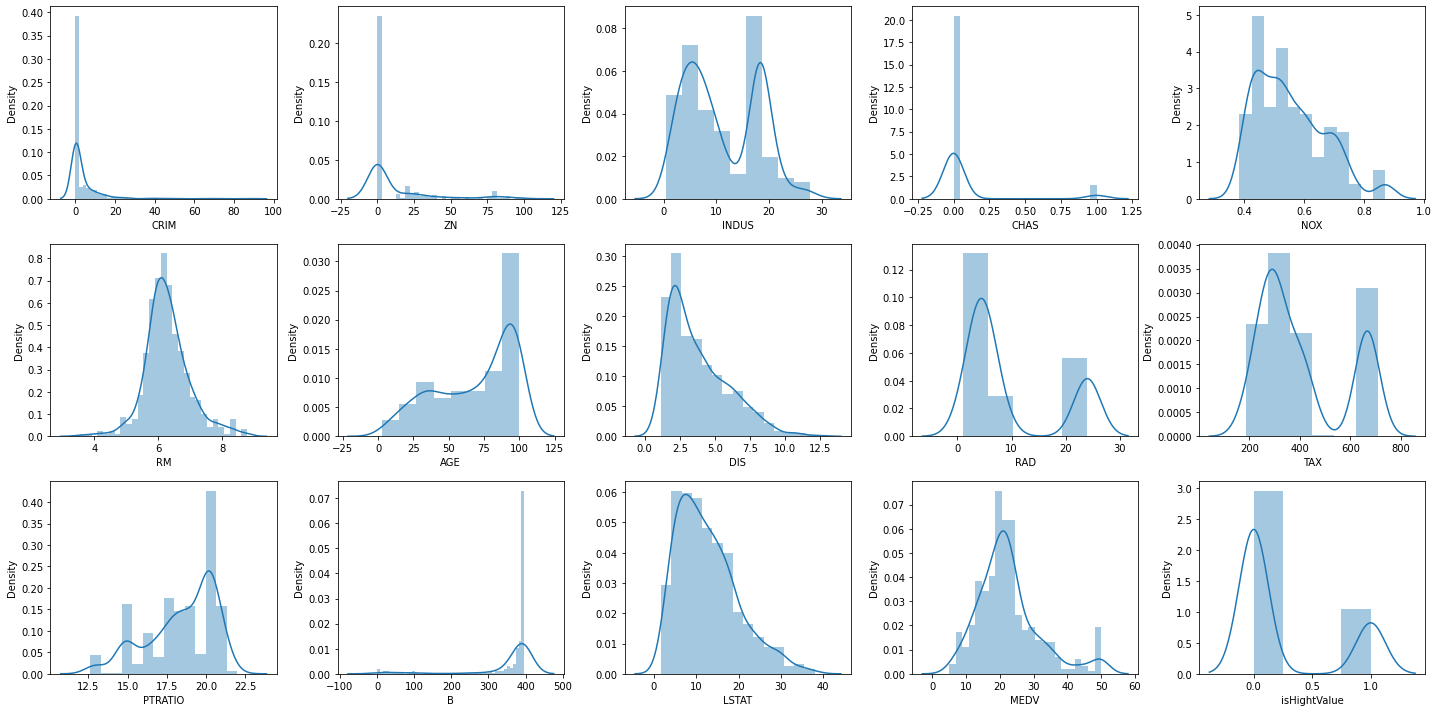

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig , axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
idx = 0 
for _row in range(3):
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax = axs[_row][_col])
      idx += 1

plt.tight_layout()

In [ ]:
print(data.apply(lambda x: x.skew(), axis=0))

CRIM            5.223149
ZN              2.225666
INDUS           0.295022
CHAS            3.405904
NOX             0.729308
RM              0.403612
AGE            -0.598963
DIS             1.011781
RAD             1.004815
TAX             0.669956
PTRATIO        -0.802325
B              -2.890374
LSTAT           0.906460
MEDV            1.108098
isHightValue    1.092403
dtype: float64


In [ ]:
import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())

1.2692005882725572


3. 회귀 모댈링
- 데이터 탐색

In [ ]:
df_r = data.drop(['isHightValue'], axis = 1)

In [ ]:
cols = ['MEDV','LSTAT','RM','CHAS','RAD','TAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TAX   -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


- 분석 모형 구축

In [ ]:
from sklearn.model_selection import train_test_split
X_cols = ['LSTAT','PTRATIO','TAX','AGE','NOX','INDUS','CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,y, test_size=0.3, random_state=123)

In [ ]:
# 데이터 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

In [ ]:
# 모델 구축
# 선형 회귀

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

In [ ]:
print(model_lr.coef_)

[-32.51042803 -11.94191767  -3.84240793   5.58034429  -4.34593586
   0.98706819   6.83941179]


In [ ]:
print(model_lr.intercept_)

38.03006298623824


In [ ]:
# svm

from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

In [ ]:
# random forest

from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor()

In [ ]:
for x, val in zip(X_cols, model_rfr.feature_importances_):
  print(f'{x} : %.3f' %val)

LSTAT : 0.713
PTRATIO : 0.070
TAX : 0.041
AGE : 0.041
NOX : 0.057
INDUS : 0.014
CRIM : 0.065


- 분석 모형 평가

In [ ]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형 회귀 결과')
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_lr))
print('MSE : %.3f' %mean_squared_error(y_test_r, y_pred_lr))
print('MAPE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_lr))
print('-'*30)
print('SVM 결과')
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_svr))
print('MSE : %.3f' %mean_squared_error(y_test_r, y_pred_svr))
print('MAPE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_svr))
print('-'*30)
print('랜덤포레스트 결과')
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_rfr))
print('MSE : %.3f' %mean_squared_error(y_test_r, y_pred_rfr))
print('MAPE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_rfr))

------------------------------
선형 회귀 결과
MAE : 4.408
MSE : 34.861
MAPE : 0.223
------------------------------
SVM 결과
MAE : 3.846
MSE : 36.890
MAPE : 0.170
------------------------------
랜덤포레스트 결과
MAE : 2.936
MSE : 17.089
MAPE : 0.145


4. 분류 모델링
- 데이터 탐색

In [ ]:
df_c = data.drop(['MEDV'],axis=1)

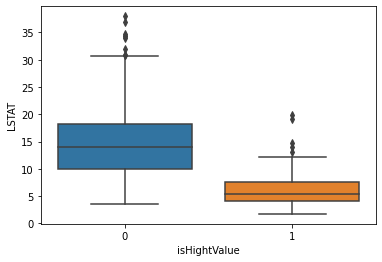

In [ ]:
import seaborn as sns

sns.boxplot(x='isHightValue',y='LSTAT',data=df_c)

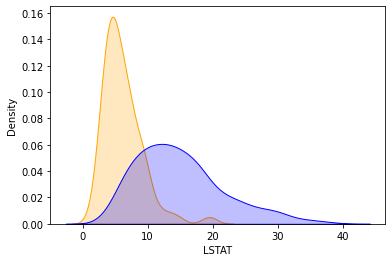

In [ ]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHightValue']==1, 'LSTAT'], color='orange',fill=True)
sns.kdeplot(df_c.loc[df_c['isHightValue']==0, 'LSTAT'], color='blue',fill=True)

In [ ]:
import numpy as np

print(df_c.groupby('isHightValue').apply(np.mean).T)

isHightValue           0           1
CRIM            0.975497    0.354194
ZN              6.691176   24.602273
INDUS          12.777353    6.488485
CHAS            0.050802    0.121212
NOX             0.575957    0.494454
RM              6.028837    7.009394
AGE            73.275134   55.257576
DIS             3.593655    4.365642
RAD            10.729947    6.204545
TAX           440.788770  316.007576
PTRATIO        18.994920   16.927273
B             346.706738  384.914697
LSTAT          14.949652    6.146061
isHightValue    0.000000    1.000000


- 분석 모형 구축

In [ ]:
# 데이터 분할

from sklearn.model_selection import train_test_split

X_cols = ['LSTAT','PTRATIO','TAX','AGE','NOX','INDUS','CRIM']

X = data[X_cols].values
y = data['isHightValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
# 데이터 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.fit_transform(X_test_c)

- 모델 구축

In [ ]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

In [ ]:
print(model_lo.coef_)

[[-4.67917856 -2.26271976 -0.80852617  0.45926521 -0.32914015 -1.36930599
   0.86834454]]


In [ ]:
print(model_lo.intercept_)

[1.90334599]


In [ ]:
# svm

from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

In [ ]:
# randomforest

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=123)
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=123)

In [ ]:
for x, val in zip(X_cols, model_rfc.feature_importances_):
  print(f'{x} : %.3f'%val)

LSTAT : 0.378
PTRATIO : 0.105
TAX : 0.112
AGE : 0.087
NOX : 0.080
INDUS : 0.134
CRIM : 0.104


- 분석 모형 평가

In [ ]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

In [ ]:
from sklearn.metrics import classification_report

print('-'*60)
print('로지스틱 회귀 결과')
print(classification_report(y_test_c, y_pred_lo, labels=[0,1]))
print('-'*60)
print('SVM 결과')
print(classification_report(y_test_c, y_pred_svc, labels=[0,1]))
print('-'*60)
print('Randomforest 결과')
print(classification_report(y_test_c, y_pred_rfc, labels=[0,1]))

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       115
           1       0.88      0.57      0.69        37

    accuracy                           0.88       152
   macro avg       0.88      0.77      0.81       152
weighted avg       0.88      0.88      0.87       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       115
           1       0.84      0.70      0.76        37

    accuracy                           0.89       152
   macro avg       0.87      0.83      0.85       152
weighted avg       0.89      0.89      0.89       152

------------------------------------------------------------
Randomforest 결과
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       115
           1       0

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:, 1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:, 1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:, 1]

print('로지스틱 회귀 결과: %.3f' %roc_auc_score(y_test_c, y_pred_lo))
print('SVM 결과: %.3f' %roc_auc_score(y_test_c, y_pred_svc))
print('랜덤포레스트 결과: %.3f' %roc_auc_score(y_test_c, y_pred_rfc))

로지스틱 회귀 결과: 0.914
SVM 결과: 0.936
랜덤포레스트 결과: 0.959
